In [1]:
from matplotlib import pyplot as plt
from os import listdir
import pandas as pd

import numpy as np

import seaborn as sns

%matplotlib inline

In [2]:
def get_file_names(datasets_folder):
    return [datasets_folder + '/' + _ for _ in listdir(datasets_folder)]

In [3]:
def read_datasets(file_names):
    read_df = lambda f_name: pd.read_csv(f_name, header=0, parse_dates=[0], infer_datetime_format=True) 
    
    df_list = list()
    for file_name in file_names:
        df_list.append(read_df(file_name))
        
    df = pd.concat(df_list, ignore_index=True)
        
    return df

In [4]:
DATASET_PATH = '../dataset'
PLOTS_PATH = '../plots'
MODELS_PATH = '../models'

In [5]:
fnames = get_file_names(MODELS_PATH)
fnames[:10]

['../models/КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_+10С_-1В-7В_200мВ_20мкс_шаг_0,1_model.csv',
 '../models/КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_+30С_-1В-6В_200мВ_20мкс_шаг_0,1_model.csv',
 '../models/КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_+30С_-5В-10В_100мВ_20мкс_шаг_0,1_model.csv',
 '../models/КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_+30С_-5В-8В_100мВ_20мкс_шаг_0,1_model.csv',
 '../models/КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_-10С_-5В-11В_100мВ_20мкс_шаг_0,1_model.csv',
 '../models/КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_-10С_-2В-3В_20мВ_20мкс_шаг_0,1_model.csv',
 '../models/КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_+10С_-5В-8В_100мВ_20мкс_шаг_0,1_model.csv',
 '../models/КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_+30С_-2В-10В_200мВ_20мкс_шаг_0,1_model.csv',
 '../models/КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_+30С_-3В-6В_100мВ_20мкс_шаг_0,1_model.csv',
 '../models/КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_+30С_-8В-12В_100мВ_20мкс_шаг_0,1_model.csv']

In [6]:
df = read_datasets(fnames)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6630 entries, 0 to 6629
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       6630 non-null   datetime64[ns]
 1   frequency_hz               6630 non-null   float64       
 2   dlts_v                     6630 non-null   float64       
 3   temperature_k              6630 non-null   float64       
 4   dlts_pf                    6630 non-null   float64       
 5   bs                         6630 non-null   int64         
 6   ls                         6630 non-null   int64         
 7   f_pulse                    6630 non-null   float64       
 8   u1                         6630 non-null   float64       
 9   ur                         6630 non-null   float64       
 10  time_between_meas          6630 non-null   float64       
 11  integral_time              6630 non-null   float64       
 12  specim

In [8]:
df

,time,frequency_hz,dlts_v,temperature_k,dlts_pf,bs,ls,f_pulse,u1,ur,time_between_meas,integral_time,specimen_name,dlts_pf_model,p_coef_model,time_constant_power_model,time_constant_model,amplitude_model,rmse_model
0,2022-05-05 13:26:03,2500.0000,-1.6970,283.165,-0.003394,1,200,20.0,-1.0,-7.0,3.5,3.0,КТ117№1 п1(база 2),-3.027591e-03,0.782566,-2.453529,0.003519,-0.015298,0.000366
1,2022-05-05 13:26:07,1985.8207,-1.8320,283.159,-0.003664,1,200,20.0,-1.0,-7.0,3.5,3.0,КТ117№1 п1(база 2),-3.654066e-03,0.782566,-2.453529,0.003519,-0.015298,0.000010
2,2022-05-05 13:26:11,1577.3937,-2.1460,283.166,-0.004292,1,200,20.0,-1.0,-7.0,3.5,3.0,КТ117№1 п1(база 2),-4.377201e-03,0.782566,-2.453529,0.003519,-0.015298,0.000085
3,2022-05-05 13:26:15,1252.9686,-2.5440,283.167,-0.005088,1,200,20.0,-1.0,-7.0,3.5,3.0,КТ117№1 п1(база 2),-5.205695e-03,0.782566,-2.453529,0.003519,-0.015298,0.000118
4,2022-05-05 13:26:19,995.2686,-3.0120,283.167,-0.006024,1,200,20.0,-1.0,-7.0,3.5,3.0,КТ117№1 п1(база 2),-6.145315e-03,0.782566,-2.453529,0.003519,-0.015298,0.000121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,2022-05-11 13:22:49,3.1473,-0.0755,303.485,-0.000075,1,100,20.0,-5.0,-9.0,3.5,3.0,КТ117№1 п1(база 2),-5.975228e-13,0.640501,-3.298008,0.000503,-0.007062,0.000075
6626,2022-05-11 13:22:53,2.5000,-0.0497,303.480,-0.000050,1,100,20.0,-5.0,-9.0,3.5,3.0,КТ117№1 п1(база 2),-2.752817e-15,0.640501,-3.298008,0.000503,-0.007062,0.000050
6627,2022-05-11 13:22:57,1.9858,-0.0600,303.484,-0.000060,1,100,20.0,-5.0,-9.0,3.5,3.0,КТ117№1 п1(база 2),-3.270310e-18,0.640501,-3.298008,0.000503,-0.007062,0.000060
6628,2022-05-11 13:23:01,1.5774,-0.1311,303.488,-0.000131,1,100,20.0,-5.0,-9.0,3.5,3.0,КТ117№1 п1(база 2),-7.062954e-22,0.640501,-3.298008,0.000503,-0.007062,0.000131


In [9]:
df['rounded_temperature'] = df.temperature_k.astype(int)
df

,time,frequency_hz,dlts_v,temperature_k,dlts_pf,bs,ls,f_pulse,u1,ur,time_between_meas,integral_time,specimen_name,dlts_pf_model,p_coef_model,time_constant_power_model,time_constant_model,amplitude_model,rmse_model,rounded_temperature
0,2022-05-05 13:26:03,2500.0000,-1.6970,283.165,-0.003394,1,200,20.0,-1.0,-7.0,3.5,3.0,КТ117№1 п1(база 2),-3.027591e-03,0.782566,-2.453529,0.003519,-0.015298,0.000366,283
1,2022-05-05 13:26:07,1985.8207,-1.8320,283.159,-0.003664,1,200,20.0,-1.0,-7.0,3.5,3.0,КТ117№1 п1(база 2),-3.654066e-03,0.782566,-2.453529,0.003519,-0.015298,0.000010,283
2,2022-05-05 13:26:11,1577.3937,-2.1460,283.166,-0.004292,1,200,20.0,-1.0,-7.0,3.5,3.0,КТ117№1 п1(база 2),-4.377201e-03,0.782566,-2.453529,0.003519,-0.015298,0.000085,283
3,2022-05-05 13:26:15,1252.9686,-2.5440,283.167,-0.005088,1,200,20.0,-1.0,-7.0,3.5,3.0,КТ117№1 п1(база 2),-5.205695e-03,0.782566,-2.453529,0.003519,-0.015298,0.000118,283
4,2022-05-05 13:26:19,995.2686,-3.0120,283.167,-0.006024,1,200,20.0,-1.0,-7.0,3.5,3.0,КТ117№1 п1(база 2),-6.145315e-03,0.782566,-2.453529,0.003519,-0.015298,0.000121,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,2022-05-11 13:22:49,3.1473,-0.0755,303.485,-0.000075,1,100,20.0,-5.0,-9.0,3.5,3.0,КТ117№1 п1(база 2),-5.975228e-13,0.640501,-3.298008,0.000503,-0.007062,0.000075,303
6626,2022-05-11 13:22:53,2.5000,-0.0497,303.480,-0.000050,1,100,20.0,-5.0,-9.0,3.5,3.0,КТ117№1 п1(база 2),-2.752817e-15,0.640501,-3.298008,0.000503,-0.007062,0.000050,303
6627,2022-05-11 13:22:57,1.9858,-0.0600,303.484,-0.000060,1,100,20.0,-5.0,-9.0,3.5,3.0,КТ117№1 п1(база 2),-3.270310e-18,0.640501,-3.298008,0.000503,-0.007062,0.000060,303
6628,2022-05-11 13:23:01,1.5774,-0.1311,303.488,-0.000131,1,100,20.0,-5.0,-9.0,3.5,3.0,КТ117№1 п1(база 2),-7.062954e-22,0.640501,-3.298008,0.000503,-0.007062,0.000131,303


In [10]:
df.rounded_temperature.unique()

array([283, 303, 263])

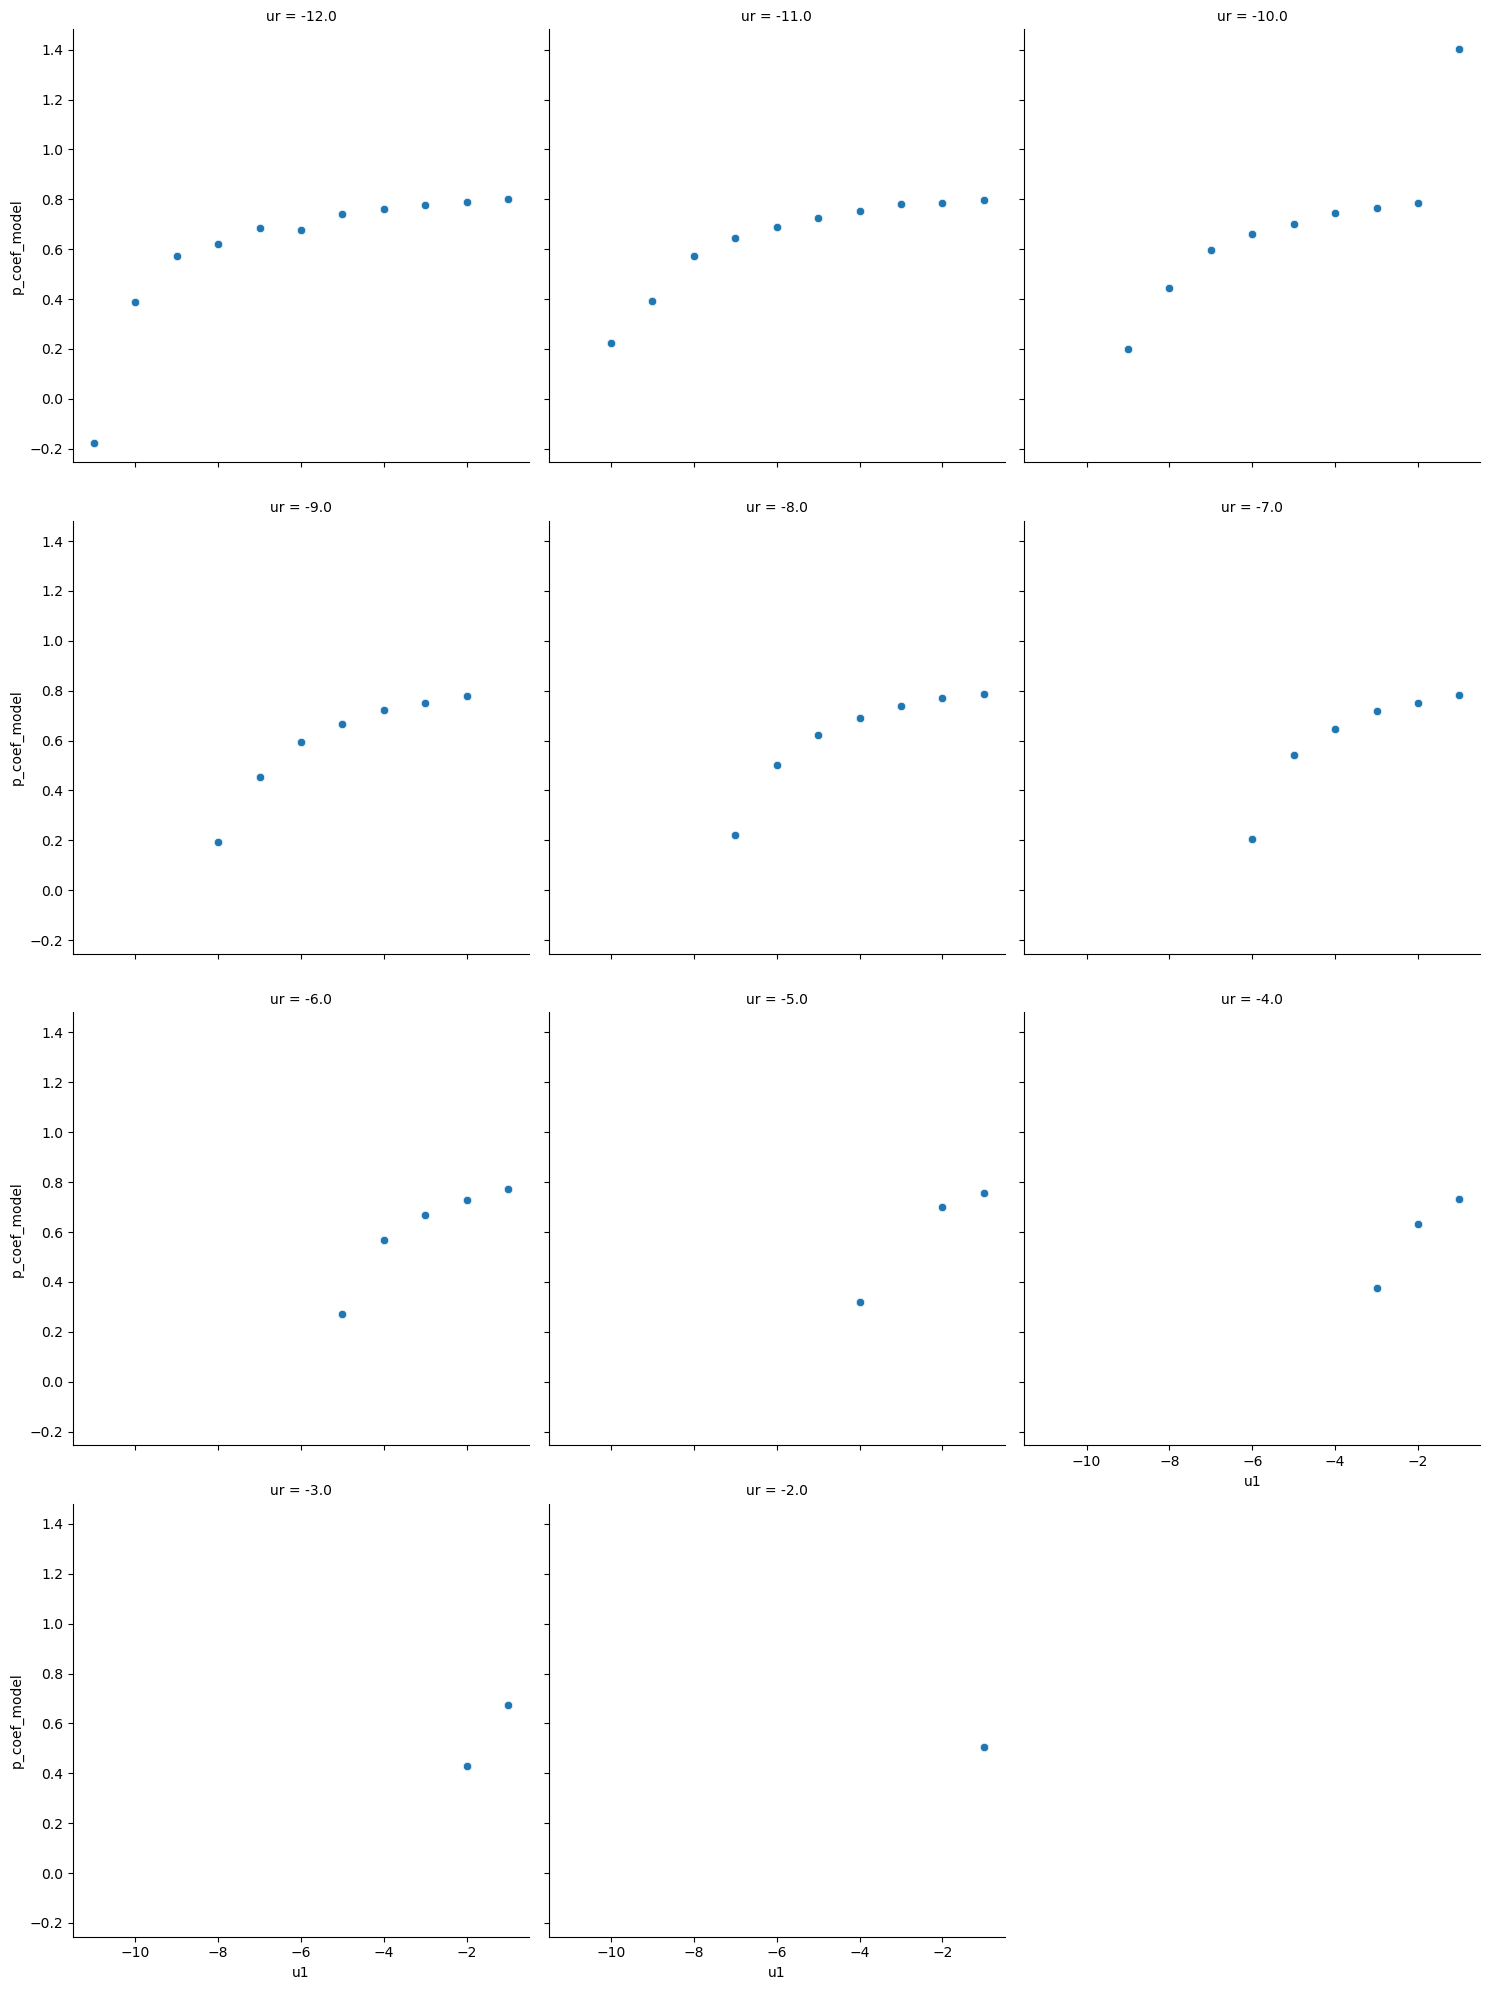

In [11]:
data = df.loc[df.rounded_temperature == 283, ['temperature_k', 'u1', 'ur', 'p_coef_model']]
sns.relplot(data=data, x='u1', y='p_coef_model', col='ur', col_wrap=3)
plt.show()

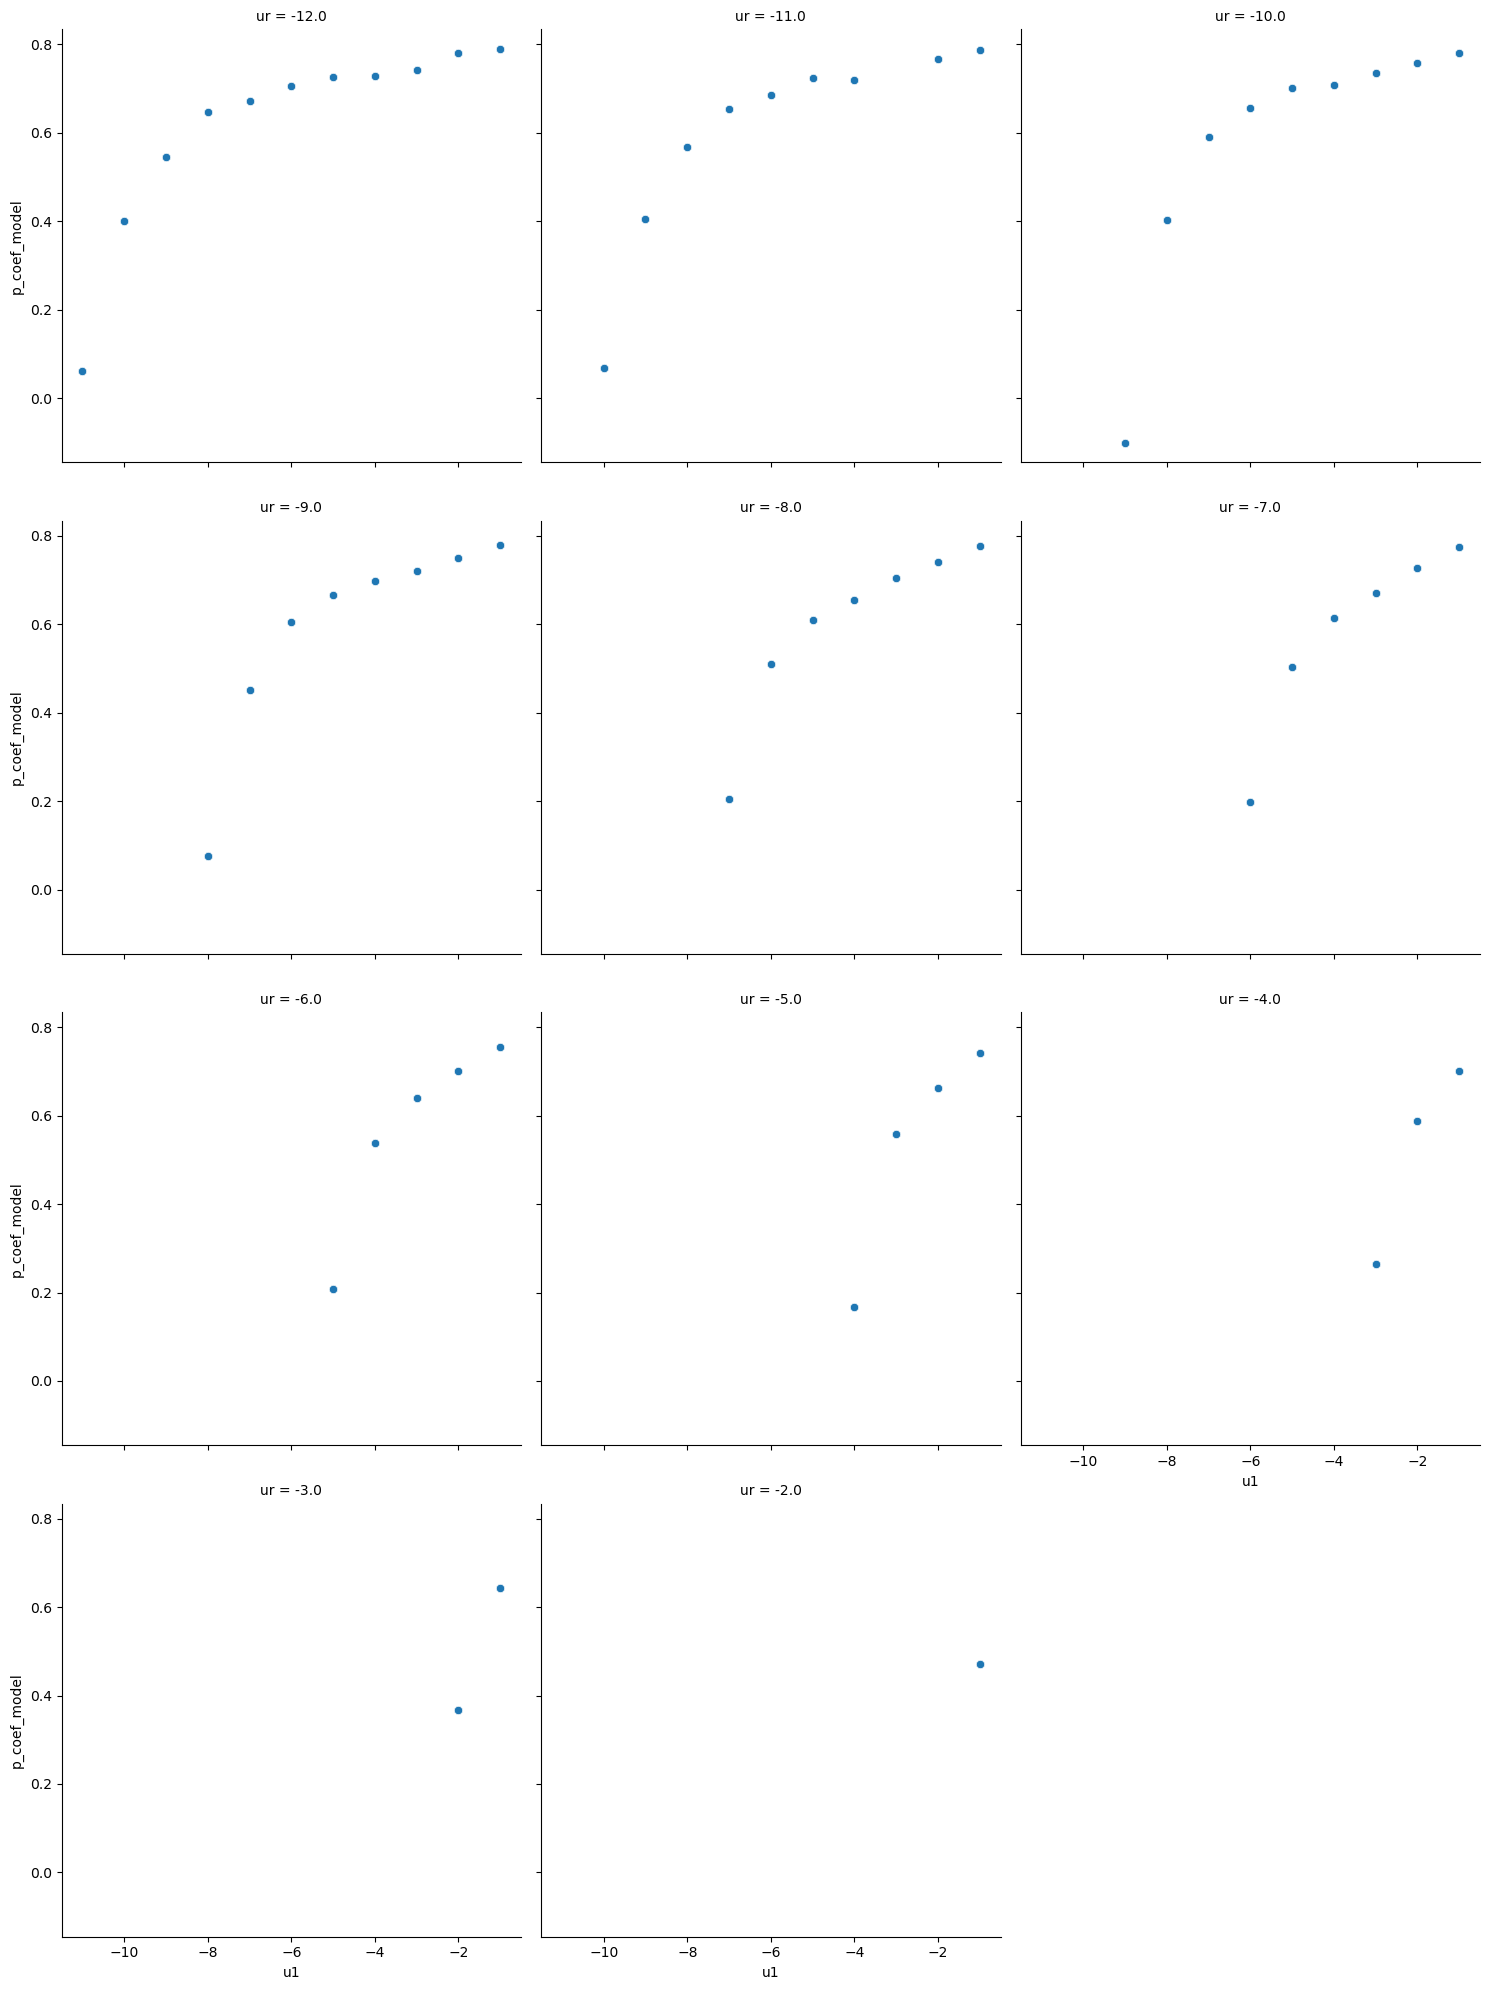

In [12]:
data = df.loc[df.rounded_temperature == 263, ['temperature_k', 'u1', 'ur', 'p_coef_model']]
sns.relplot(data=data, x='u1', y='p_coef_model', col='ur', col_wrap=3)
plt.show()

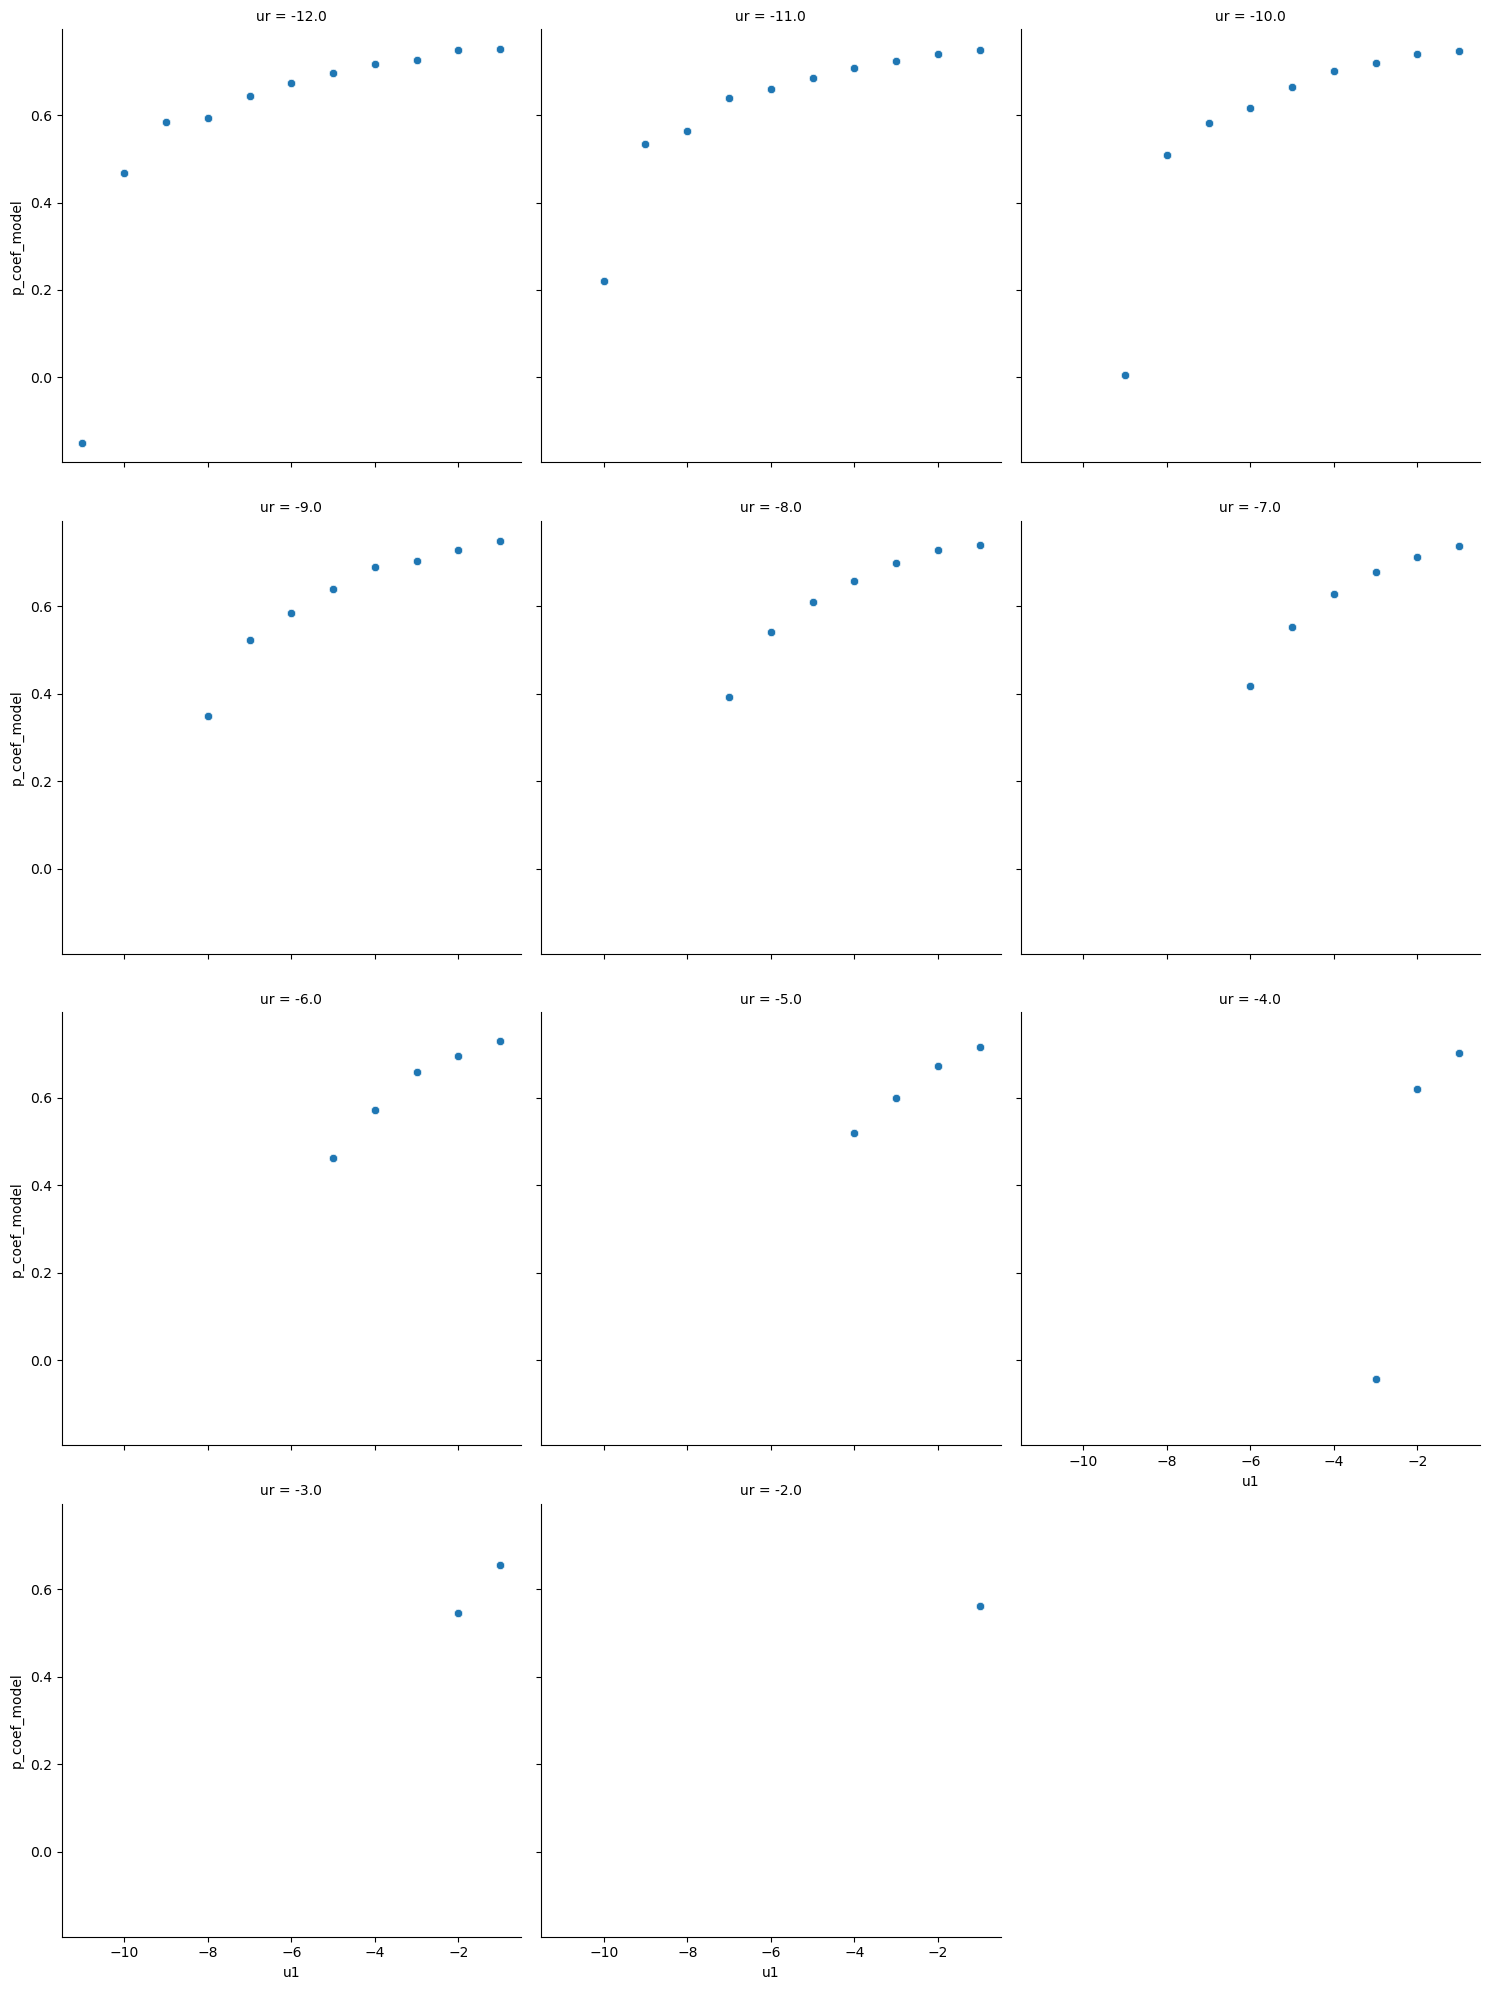

In [13]:
data = df.loc[df.rounded_temperature == 303, ['temperature_k', 'u1', 'ur', 'p_coef_model']]
sns.relplot(data=data, x='u1', y='p_coef_model', col='ur', col_wrap=3)
plt.show()

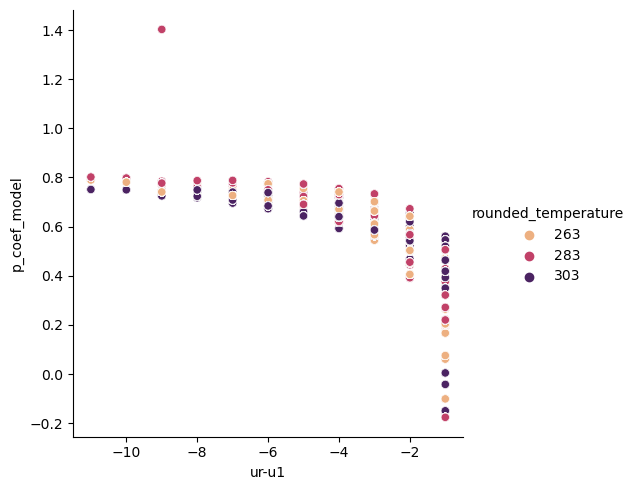

In [14]:
df['ur-u1'] = df.ur - df.u1
sns.relplot(data=df, x='ur-u1', y='p_coef_model', hue='rounded_temperature', palette='flare')

In [15]:
df[df.p_coef_model > 1]

,time,frequency_hz,dlts_v,temperature_k,dlts_pf,bs,ls,f_pulse,u1,ur,...,integral_time,specimen_name,dlts_pf_model,p_coef_model,time_constant_power_model,time_constant_model,amplitude_model,rmse_model,rounded_temperature,ur-u1
1292,2022-05-05 11:30:56,2500.0000,-1.5680,283.102,-0.003136,1,200,20.0,-1.0,-10.0,...,3.0,КТ117№1 п1(база 2),1.103473e-05,1.402523,-4.894878,0.000013,0.000361,0.003147,283,-9.0
1293,2022-05-05 11:31:00,1985.8207,-1.7080,283.110,-0.003416,1,200,20.0,-1.0,-10.0,...,3.0,КТ117№1 п1(база 2),4.517483e-06,1.402523,-4.894878,0.000013,0.000361,0.003421,283,-9.0
1294,2022-05-05 11:31:04,1577.3937,-1.9760,283.108,-0.003952,1,200,20.0,-1.0,-10.0,...,3.0,КТ117№1 п1(база 2),1.595569e-06,1.402523,-4.894878,0.000013,0.000361,0.003954,283,-9.0
1295,2022-05-05 11:31:08,1252.9686,-2.3500,283.091,-0.004700,1,200,20.0,-1.0,-10.0,...,3.0,КТ117№1 п1(база 2),4.679726e-07,1.402523,-4.894878,0.000013,0.000361,0.004700,283,-9.0
1296,2022-05-05 11:31:12,995.2686,-2.8130,283.096,-0.005626,1,200,20.0,-1.0,-10.0,...,3.0,КТ117№1 п1(база 2),1.086206e-07,1.402523,-4.894878,0.000013,0.000361,0.005626,283,-9.0
1297,2022-05-05 11:31:16,790.5701,-3.3380,283.118,-0.006676,1,200,20.0,-1.0,-10.0,...,3.0,КТ117№1 п1(база 2),1.877932e-08,1.402523,-4.894878,0.000013,0.000361,0.006676,283,-9.0
1298,2022-05-05 11:31:20,627.9723,-3.9230,283.102,-0.007846,1,200,20.0,-1.0,-10.0,...,3.0,КТ117№1 п1(база 2),2.240792e-09,1.402523,-4.894878,0.000013,0.000361,0.007846,283,-9.0
1299,2022-05-05 11:31:24,498.8163,-4.5560,283.103,-0.009112,1,200,20.0,-1.0,-10.0,...,3.0,КТ117№1 п1(база 2),1.676404e-10,1.402523,-4.894878,0.000013,0.000361,0.009112,283,-9.0
1300,2022-05-05 11:31:28,396.2239,-5.2020,283.107,-0.010404,1,200,20.0,-1.0,-10.0,...,3.0,КТ117№1 п1(база 2),6.968083e-12,1.402523,-4.894878,0.000013,0.000361,0.010404,283,-9.0
1301,2022-05-05 11:31:32,314.7319,-5.8580,283.096,-0.011716,1,200,20.0,-1.0,-10.0,...,3.0,КТ117№1 п1(база 2),1.382036e-13,1.402523,-4.894878,0.000013,0.000361,0.011716,283,-9.0


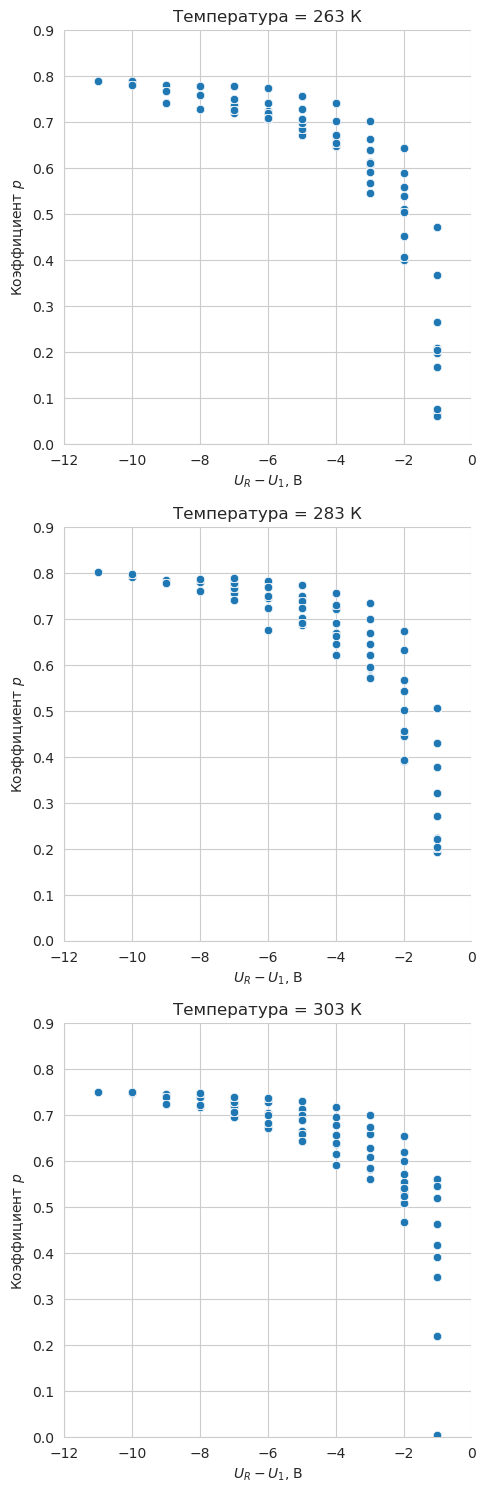

In [16]:
sns.set_style("whitegrid")

g = sns.relplot(data=df, 
                x='ur-u1', 
                y='p_coef_model',
                row='rounded_temperature',
                height=5,
                facet_kws={'sharey':False,
                           'sharex':False},
               )

axes = g.axes.flatten()

axes[0].set_title('Температура = 263 К')
axes[0].set_ylim([0, 0.9])
axes[0].set_xlim([-12, 0])
axes[0].set_xlabel('$U_R - U_1$, В')
axes[0].set_ylabel('Коэффициент $p$')

axes[1].set_title('Температура = 283 К')
axes[1].set_ylim([0, 0.9])
axes[1].set_xlim([-12, 0])
axes[1].set_xlabel('$U_R - U_1$, В')
axes[1].set_ylabel('Коэффициент $p$')

axes[2].set_title('Температура = 303 К')
axes[2].set_ylim([0, 0.9])
axes[2].set_xlim([-12, 0])
axes[2].set_xlabel('$U_R - U_1$, В')
axes[2].set_ylabel('Коэффициент $p$')

plt.subplots_adjust(hspace=0.2 ,wspace=0.2)
plt.savefig('../Отчёт/images/Зависимость_p_от_разности_u1_ur.pdf', bbox_inches='tight')
plt.show()

In [17]:
# sns.set_theme(style="dark")

# data = df.loc[df.rounded_temperature == 263, ['temperature_k', 'u1', 'ur', 'p_coef_model']]
# sns.relplot(data=data, x='u1', y='p_coef_model', hue='ur', palette='colorblind',height=10)
# plt.show()

In [18]:
# df[df.rounded_temperature == 263].pivot(index = 'u1', columns='ur', values='p_coef_model')


In [19]:
# df.loc[df.rounded_temperature == 263, ['u1']].value_counts()

In [20]:
# data = df.loc[df.rounded_temperature == 263, ['u1', 'ur', 'p_coef_model']].melt()

# trues = np.ones_like(corr_matrix, dtype=bool)
# mask = np.triu(trues, k=0)

# f, ax = plt.subplots(figsize=(10, 10))

# cmap = sns.color_palette("coolwarm", as_cmap=True)

# sns.heatmap(corr_matrix, 
#             mask=mask, 
#             annot=True,
#             cmap=cmap, 
#             vmax=1,
#             vmin=-1,
#             center=0, 
#             square=True, 
#             linewidths=3,
#             cbar_kws={"shrink": .5},
#            )

# ax.set_title('Correlation coefficient')

# plt.show()